In [ ]:
import sys
print("Python version")
print(sys.version)

Python version
3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 20:33:18) 
[Clang 11.1.0 ]


In [ ]:
# Install the following packages
!conda install -c conda -y matplotlib
!conda install -c conda -y pandas
!conda install -c conda -y seaborn

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
census_data = pd.read_csv('census_2022_2002.csv', encoding="ISO-8859-1")

In [ ]:
census_data.head()

,country,region,subregion,year,total.fertility.rate,life.expectancy.both.sexes,life.expectancy.males,life.expectancy.females
0,Afghanistan,Asia,South-Central Asia,2002,6.0000,46.10,45.11,47.15
1,Afghanistan,Asia,South-Central Asia,2022,4.6240,53.65,52.10,55.28
2,Albania,Europe,Southern Europe,2002,1.9949,75.44,72.79,78.43
3,Albania,Europe,Southern Europe,2022,1.5402,79.47,76.80,82.33
4,Algeria,Africa,Northern Africa,2002,2.3304,72.99,72.06,73.97


In [ ]:
len(census_data.region.unique())

5

In [ ]:
census_data.shape

(454, 8)

In [ ]:
# Null values
census_data.isna().sum()

country                       0
region                        0
subregion                     0
year                          0
total.fertility.rate          6
life.expectancy.both.sexes    6
life.expectancy.males         6
life.expectancy.females       6
dtype: int64

In [ ]:
is_NaN = census_data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = census_data[row_has_NaN]
rows_with_NaN

,country,region,subregion,year,total.fertility.rate,life.expectancy.both.sexes,life.expectancy.males,life.expectancy.females
234,Libya,Africa,Northern Africa,2002,NaN,NaN,NaN,NaN
324,Puerto Rico,Americas,Caribbean,2002,NaN,NaN,NaN,NaN
378,South Sudan,Africa,Northern Africa,2002,NaN,NaN,NaN,NaN
384,Sudan,Africa,Northern Africa,2002,NaN,NaN,NaN,NaN
392,Syria,Asia,Western Asia,2002,NaN,NaN,NaN,NaN
428,United States,Americas,Northern America,2002,NaN,NaN,NaN,NaN


In [ ]:
census_data['region'].unique().shape

(5,)

In [ ]:
census_data['subregion'].unique().shape

(21,)

In [ ]:
data_description = census_data[['total.fertility.rate', 'life.expectancy.both.sexes',
             'life.expectancy.males', 'life.expectancy.females']].describe()
data_description

,total.fertility.rate,life.expectancy.both.sexes,life.expectancy.males,life.expectancy.females
count,448.000000,448.000000,448.000000,448.000000
mean,2.701384,71.758080,69.362076,74.278080
std,1.444490,8.728865,8.429339,9.162633
min,0.837400,44.580000,43.540000,44.990000
25%,1.687075,67.877500,65.315000,69.910000
50%,2.107000,73.765000,71.275000,76.565000
75%,3.445775,78.032500,75.267500,80.982500
max,8.200000,89.520000,85.700000,93.490000


In [ ]:
data_description.to_csv('data_description.csv')

In [ ]:
census_data.shape

(454, 8)

### Task 1: Describe the frequency distributions of the variables. Consider also the differences between the sexes.

In [ ]:
census_data_2022 = census_data[census_data['year'] == 2022]

In [ ]:
data_description = census_data_2022[['total.fertility.rate', 'life.expectancy.both.sexes',
             'life.expectancy.males', 'life.expectancy.females']].describe()
data_description

,total.fertility.rate,life.expectancy.both.sexes,life.expectancy.males,life.expectancy.females
count,227.000000,227.000000,227.000000,227.000000
mean,2.406140,74.578062,72.096608,77.182159
std,1.111029,6.839362,6.673894,7.129702
min,1.083000,53.650000,52.100000,55.280000
25%,1.683150,70.050000,67.930000,72.630000
50%,1.954000,75.820000,73.260000,78.690000
75%,2.778900,79.655000,77.190000,82.555000
max,6.819400,89.520000,85.700000,93.490000


In [ ]:
census_data_2022.shape

(227, 8)

#### Total Fertility rate

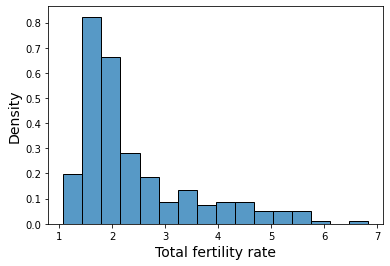

In [ ]:
a = sns.histplot(data = census_data_2022, x = 'total.fertility.rate', stat='density',
             palette='tab10')
a.set_xlabel("Total fertility rate", fontsize = 14)
a.set_ylabel('Density', fontsize = 14)
plt.savefig('frequency_distribution_fertility_rate.pdf', bbox_inches='tight', dpi=200)
plt.show()

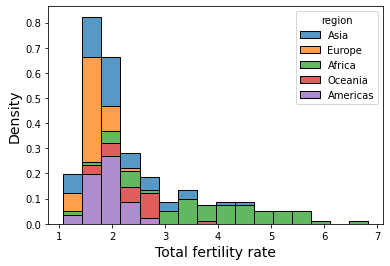

In [ ]:
a = sns.histplot(data = census_data_2022, x = 'total.fertility.rate', stat='density',
             hue='region', palette='tab10', multiple="stack")
a.set_xlabel("Total fertility rate", fontsize = 14)
a.set_ylabel('Density', fontsize = 14)

plt.savefig('frequency_distribution_fertility_rate_colored.pdf', bbox_inches='tight', dpi=200)

#### Life expectancy both sexes

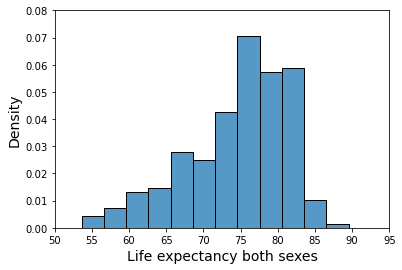

In [ ]:
b = sns.histplot(data = census_data_2022, x = 'life.expectancy.both.sexes', stat='density',
             palette='tab10')

b.set(xlim=(50, 95))
b.set(ylim=(0, 0.08))
b.set_xlabel("Life expectancy both sexes", fontsize = 14)
b.set_ylabel('Density', fontsize = 14)
plt.savefig('frequency_distribution_life_exp_both.pdf', bbox_inches='tight', dpi=200)
plt.show()

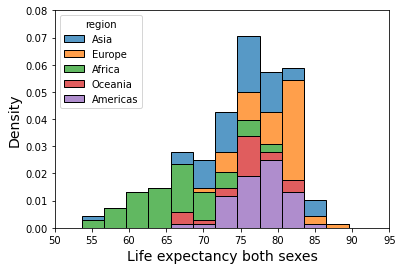

In [ ]:
b = sns.histplot(data = census_data_2022, x = 'life.expectancy.both.sexes', stat='density',
             hue='region', palette='tab10', multiple="stack")
b.set(xlim=(50, 95))
b.set(ylim=(0, 0.08))
b.set_xlabel("Life expectancy both sexes", fontsize = 14)
b.set_ylabel('Density', fontsize = 14)
plt.savefig('frequency_distribution_life_exp_both_colored.pdf', bbox_inches='tight', dpi=200)

#### Life expectancy males

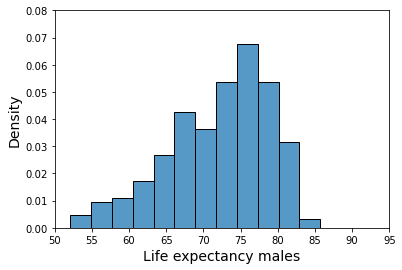

In [ ]:
c = sns.histplot(data = census_data_2022, x = 'life.expectancy.males', stat='density')
c.set(xlim=(50, 95))
c.set(ylim=(0, 0.08))
c.set_xlabel("Life expectancy males", fontsize = 14)
c.set_ylabel('Density', fontsize = 14)
plt.savefig('frequency_distribution_males.pdf', bbox_inches='tight', dpi=200)
plt.show()

#### Life expectancy females

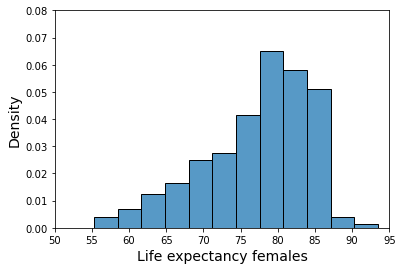

In [ ]:
d = sns.histplot(data=census_data_2022, x='life.expectancy.females', stat='density')
d.set(xlim=(50, 95))
d.set(ylim=(0, 0.08))
d.set_xlabel("Life expectancy females", fontsize = 14)
d.set_ylabel('Density', fontsize = 14)
plt.savefig('frequency_distribution_females.pdf', bbox_inches='tight', dpi=200)

#### Differences between sexes

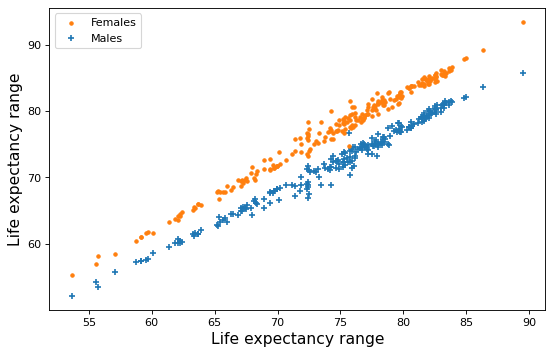

In [ ]:
fig = plt.figure(figsize=(8, 5), dpi = 80)

males = plt.scatter(data=census_data_2022, x="life.expectancy.both.sexes", y="life.expectancy.males", marker='+')
females = plt.scatter(data=census_data_2022, x="life.expectancy.both.sexes", y="life.expectancy.females", marker='.')

plt.xlabel('Life expectancy range',fontsize=14)
plt.ylabel('Life expectancy range',fontsize=14)
# plt.title('Differences between the sexes',fontsize=12, y=1.03)
plt.legend((females, males), ['Females','Males'], loc='upper left')
plt.savefig('different_between_sexes.pdf', dpi=200, bbox_inches='tight')
plt.show()

### Task 2: Are there bivariate correlations between the variables?

In [ ]:
census_data_2022_variables = census_data_2022.drop(columns = ['country', 'subregion', 'region', 'year'])

In [ ]:
census_data_2022_variables.head()

,total.fertility.rate,life.expectancy.both.sexes,life.expectancy.males,life.expectancy.females
1,4.6240,53.65,52.10,55.28
3,1.5402,79.47,76.80,82.33
5,2.5058,78.03,76.57,79.57
7,2.2060,75.32,72.83,77.97
9,1.4474,83.42,81.20,85.79


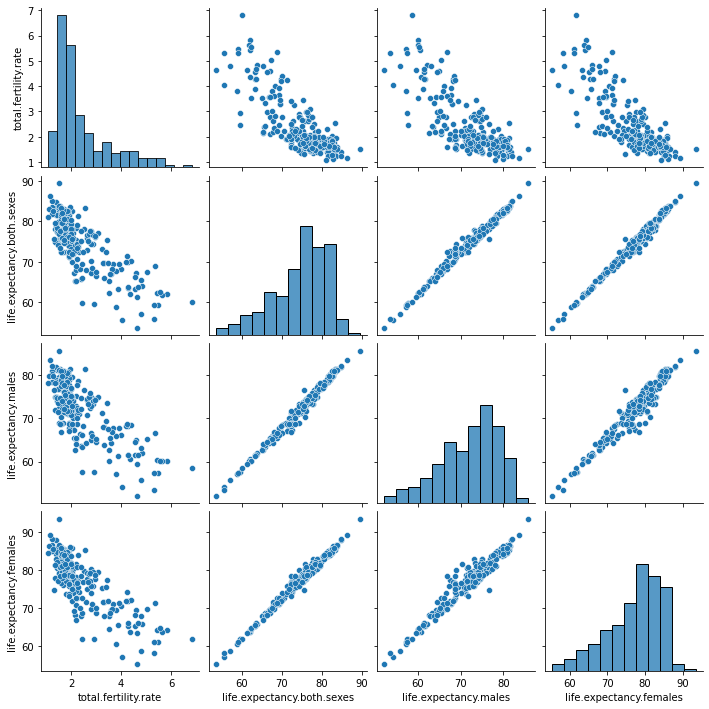

In [ ]:
sns.pairplot(census_data_2022_variables)

In [ ]:
correlation = census_data_2022_variables.corr()

In [ ]:
correlation.to_csv('correlation.csv', index = False)

In [ ]:
correlation

,total.fertility.rate,life.expectancy.both.sexes,life.expectancy.males,life.expectancy.females
total.fertility.rate,1.000000,-0.788528,-0.760606,-0.805001
life.expectancy.both.sexes,-0.788528,1.000000,0.992615,0.992935
life.expectancy.males,-0.760606,0.992615,1.000000,0.971249
life.expectancy.females,-0.805001,0.992935,0.971249,1.000000


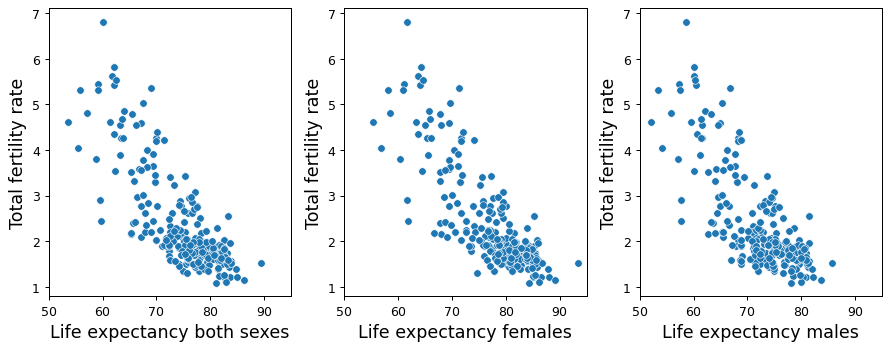

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), dpi=90)
a = sns.scatterplot(data=census_data_2022_variables, x='life.expectancy.both.sexes', y='total.fertility.rate', ax=axes[0])
a.set_xlabel("Life expectancy both sexes", fontsize = 14)
a.set_ylabel('Total fertility rate', fontsize = 14)
a.set(xlim=(50, 95))

b = sns.scatterplot(data=census_data_2022_variables, x='life.expectancy.females', y='total.fertility.rate', ax=axes[1])
b.set_xlabel("Life expectancy females", fontsize = 14)
b.set_ylabel('Total fertility rate', fontsize = 14)
b.set(xlim=(50, 95))

c = sns.scatterplot(data=census_data_2022_variables, x='life.expectancy.males', y='total.fertility.rate', ax=axes[2])
c.set_xlabel("Life expectancy males", fontsize = 14)
c.set_ylabel('Total fertility rate', fontsize = 14)
c.set(xlim=(50, 95))

#fig.suptitle('Change in life expectancy over 20 years',fontsize=12, y=1)
plt.tight_layout()
plt.savefig('negative_correlation.pdf', bbox_inches='tight', dpi=200)
plt.show()

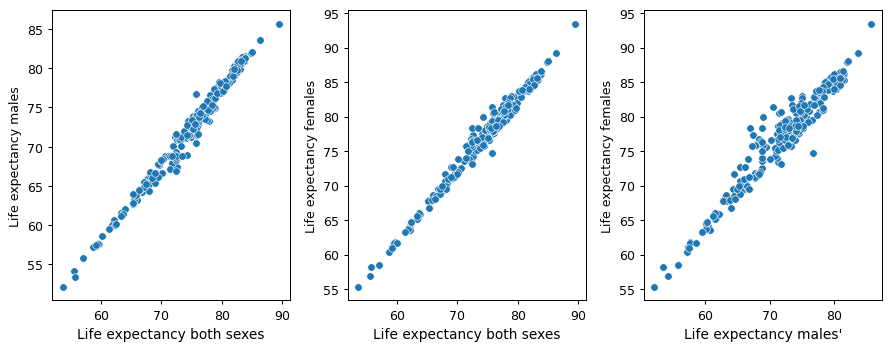

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), dpi=90)
a = sns.scatterplot(data=census_data_2022_variables, x='life.expectancy.both.sexes', y='life.expectancy.males', ax=axes[0])
a.set_xlabel("Life expectancy both sexes", fontsize = 11)
a.set_ylabel('Life expectancy males', fontsize = 10)

b = sns.scatterplot(data=census_data_2022_variables, x='life.expectancy.both.sexes', y='life.expectancy.females', ax=axes[1])
b.set_xlabel("Life expectancy both sexes", fontsize = 11)
b.set_ylabel('Life expectancy females', fontsize = 10)

c = sns.scatterplot(data=census_data_2022_variables, x='life.expectancy.males', y='life.expectancy.females', ax=axes[2])
c.set_xlabel("Life expectancy males'", fontsize = 11)
c.set_ylabel('Life expectancy females', fontsize = 10)

#fig.suptitle('Change in life expectancy over 20 years',fontsize=12, y=1)
plt.tight_layout()
plt.savefig('positive_correlation.eps', format='eps', bbox_inches='tight')
plt.show()

### Task 3: Comparison of variability within and among subregions

#### 1. Total Fertility Rate

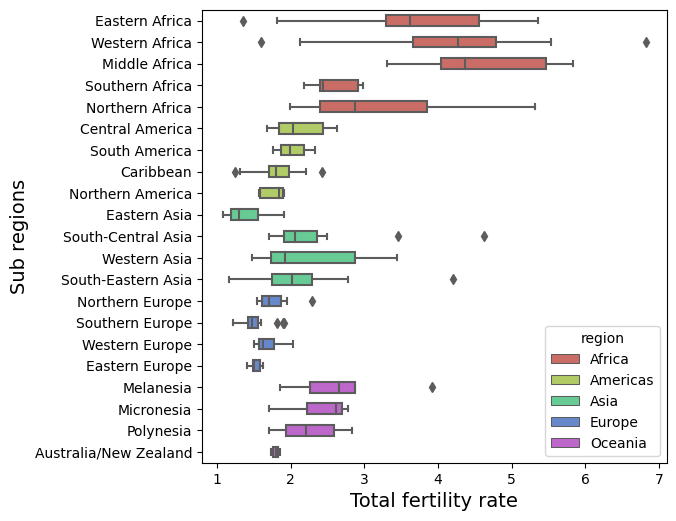

In [ ]:
fig = plt.figure(figsize=(6,6), dpi=100, frameon=True)
ax = sns.boxplot(data = census_data_2022.sort_values(by="region"),
                x = 'total.fertility.rate',
                y = 'subregion',
                width = 0.5,
                dodge=False,
                hue = 'region',
                palette="hls",
                orient="h")
plt.xlabel('Total fertility rate',fontsize=14)
plt.ylabel('Sub regions',fontsize=14)
# plt.title('Comparison of total fertility rate variability between sub-regions',fontsize=14, y=1.01)
plt.savefig('variability_in_total_fertility.pdf', bbox_inches='tight', dpi=200)
plt.show()

#### 2. Life expectancy both sexes

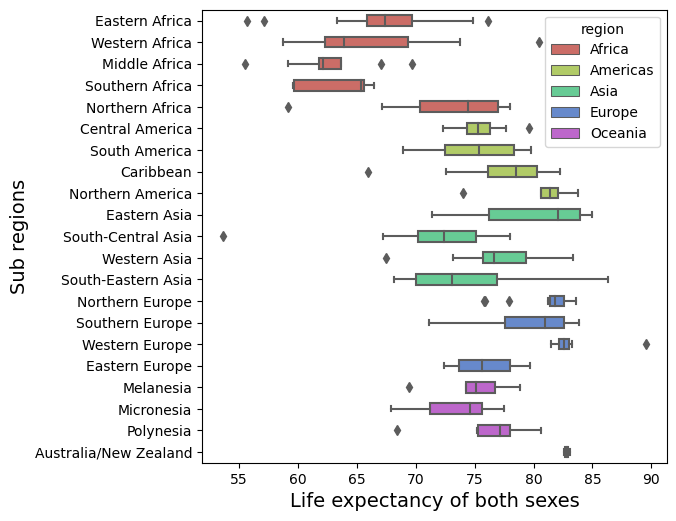

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi = 100, frameon=True)
ax = sns.boxplot(data = census_data_2022.sort_values(by="region"),
                x = 'life.expectancy.both.sexes',
                y = 'subregion',
                hue = 'region',
                width = 0.5,
                dodge=False,
                palette="hls")
plt.xlabel('Life expectancy of both sexes',fontsize=14)
plt.ylabel('Sub regions',fontsize=14)
# plt.title('Comparison of life expectancy of both sexes variability between sub-regions',fontsize=14, y=1.01)
plt.savefig('variability_in_both_sexes.pdf', bbox_inches='tight', dpi=200)
plt.show()

#### 3. Life expectancy males

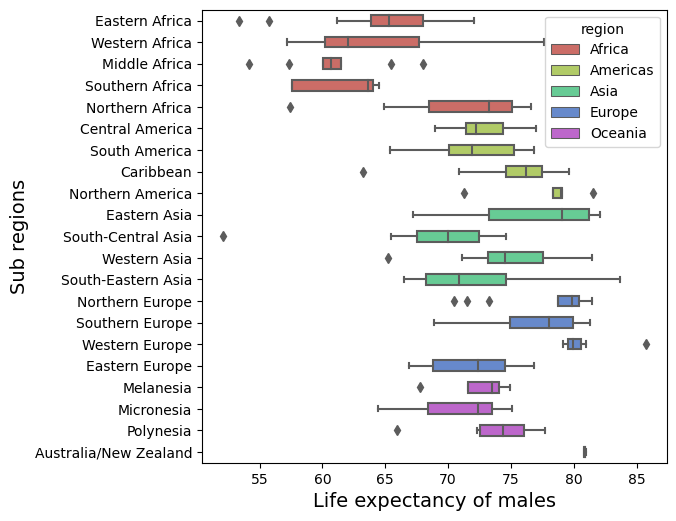

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi = 100, frameon=True)
ax = sns.boxplot(data = census_data_2022.sort_values(by="region"),
                x = 'life.expectancy.males',
                y = 'subregion',
                hue = 'region',
                width = 0.5,
                dodge = False,
                palette="hls")
plt.xlabel('Life expectancy of males',fontsize=14)
plt.ylabel('Sub regions',fontsize=14)
# plt.title('Comparison of life expectancy of males variability between sub-regions',fontsize=14, y=1.01)
plt.savefig('variability_in_males.pdf', bbox_inches='tight', dpi=200)
plt.show()

#### 4. Life expectancy females

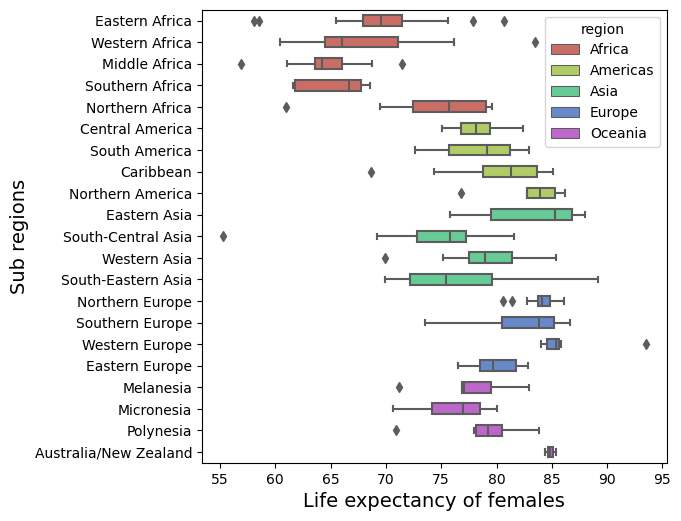

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi = 100, frameon=True)
ax = sns.boxplot(data = census_data_2022.sort_values(by="region"),
                x = 'life.expectancy.females',
                y = 'subregion',
                hue = 'region',
                width = 0.5,
                dodge = False,
                palette="hls")
plt.xlabel('Life expectancy of females',fontsize=14)
plt.ylabel('Sub regions',fontsize=14)
# plt.title('Comparison of life expectancy of females variability between sub-regions',fontsize=14, y=1.01)
plt.savefig('variability_in_females.pdf', bbox_inches='tight', dpi=200)
plt.show()

### Task 4: How have the values of the variables changed over the last 20 years, i.e. comparing 2001 with 2021?

In [ ]:
census_data.head()

,country,region,subregion,year,total.fertility.rate,life.expectancy.both.sexes,life.expectancy.males,life.expectancy.females
0,Afghanistan,Asia,South-Central Asia,2002,6.0000,46.10,45.11,47.15
1,Afghanistan,Asia,South-Central Asia,2022,4.6240,53.65,52.10,55.28
2,Albania,Europe,Southern Europe,2002,1.9949,75.44,72.79,78.43
3,Albania,Europe,Southern Europe,2022,1.5402,79.47,76.80,82.33
4,Algeria,Africa,Northern Africa,2002,2.3304,72.99,72.06,73.97


In [ ]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [ ]:
census_data[census_data['year'] == 2002]['total.fertility.rate'].mean()

3.004643891402715

In [ ]:
census_data[census_data['year'] == 2022]['total.fertility.rate'].mean()

2.4061399559471353

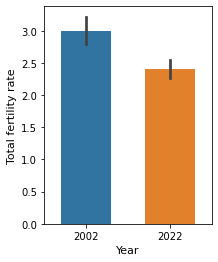

In [ ]:
fig, ax = plt.subplots(figsize=(3, 4))

a = sns.barplot(data=census_data, x='year', y='total.fertility.rate', ax=ax)
a.set_xlabel('Year', fontsize=11)
a.set_ylabel('Total fertility rate', fontsize=11)

change_width(ax, .60)

plt.savefig('change_in_total_fertility_rate.pdf', bbox_inches='tight', dpi=200)
plt.show()

In [ ]:
census_data[census_data['year'] == 2002]['life.expectancy.both.sexes'].mean()

68.86153846153846

In [ ]:
census_data[census_data['year'] == 2022]['life.expectancy.both.sexes'].mean()

74.57806167400882

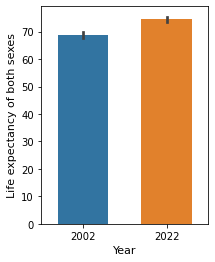

In [ ]:
fig, ax = plt.subplots(figsize=(3, 4))

b = sns.barplot(data=census_data, x='year', y='life.expectancy.both.sexes', ax=ax)
b.set_xlabel('Year', fontsize=11)
b.set_ylabel('Life expectancy of both sexes', fontsize=11)

change_width(ax, .60)

plt.savefig('change_in_life_expectancy.pdf', bbox_inches='tight',dpi=200)
plt.show()

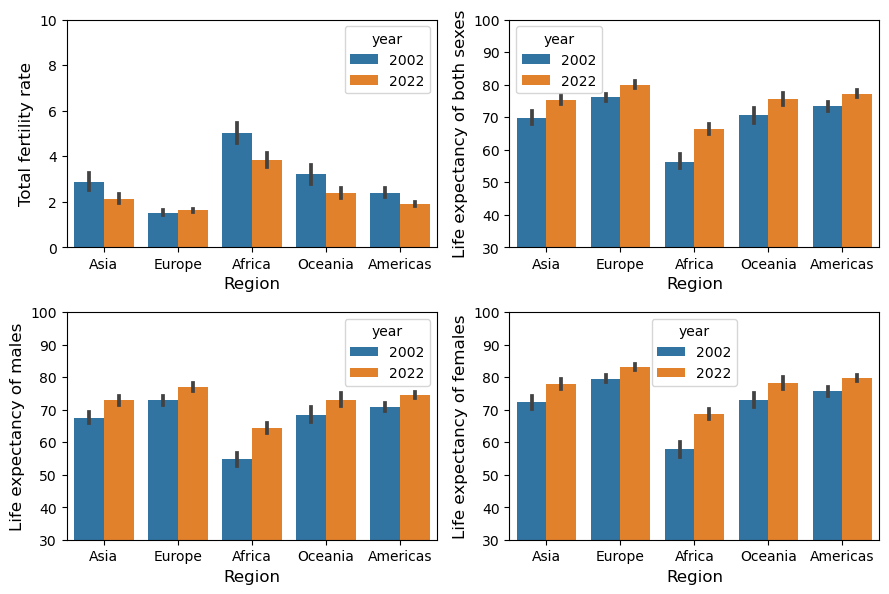

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(9, 6), dpi=100)

a = sns.barplot(ax=axes[0, 0], data=census_data,
                x='region', y='total.fertility.rate',
                hue='year')
a.set_xlabel("Region", fontsize = 12)
a.set_ylabel('Total fertility rate', fontsize = 12)
a.set(ylim=(0, 10))

b = sns.barplot(ax=axes[0, 1], data=census_data,
                x='region', y='life.expectancy.both.sexes',
                hue='year')
b.set_xlabel("Region", fontsize = 12)
b.set_ylabel('Life expectancy of both sexes', fontsize = 12)
b.set(ylim=(30, 100))

c = sns.barplot(ax=axes[1, 0], data=census_data,
                x='region', y='life.expectancy.males',
                hue='year')
c.set_xlabel("Region", fontsize = 12)
c.set_ylabel('Life expectancy of males', fontsize = 12)
c.set(ylim=(30, 100))

d = sns.barplot(ax=axes[1, 1], data=census_data,
                x='region', y='life.expectancy.females',
                hue='year')
d.set_xlabel("Region", fontsize = 12)
d.set_ylabel('Life expectancy of females', fontsize = 12)
d.set(ylim=(30, 100))

# fig.suptitle('Change in life expectancy over 20 years',fontsize=12, y=1)
plt.tight_layout()
plt.savefig('change_in_years_overall.pdf', bbox_inches='tight', dpi=200)

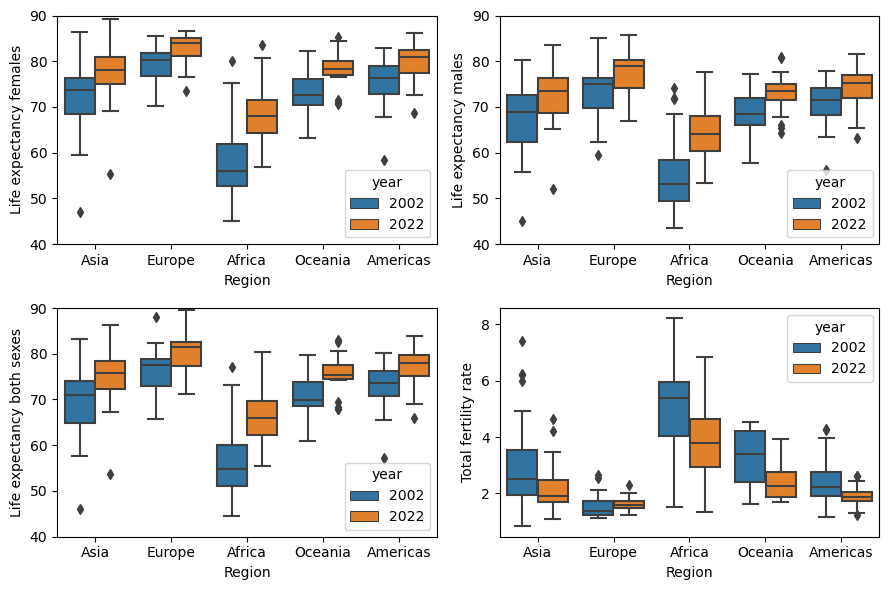

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(9, 6), dpi=100)


ax=sns.boxplot(ax=axes[0, 0], data=census_data, x='region', y='life.expectancy.females',hue='year')
bx=sns.boxplot(ax=axes[0, 1], data=census_data, x='region', y='life.expectancy.males',hue='year')
cx=sns.boxplot(ax=axes[1, 0], data=census_data, x='region', y='life.expectancy.both.sexes',hue='year')
dx = sns.boxplot(ax=axes[1, 1], data=census_data, x='region', y='total.fertility.rate',hue='year')
# To provide equal scaling to the box-plots
ax.set(xlabel = 'Region',ylabel = 'Life expectancy females', ylim=(40, 90))
bx.set(xlabel = 'Region',ylabel = 'Life expectancy males',ylim=(40, 90))
cx.set(xlabel = 'Region',ylabel = 'Life expectancy both sexes',ylim=(40, 90))
dx.set(xlabel = 'Region',ylabel = 'Total fertility rate',)

plt.tight_layout()
plt.savefig('Figure 4.pdf', bbox_inches='tight', dpi=180)